## <font color=blue> Python Lab #04 </font>: Sampling and Quantization


### Homework submission: School MOOC system
### <font color=red> Due date: Oct. 26 (Wednesday), 24:00 </font>
#### <font color=red> NOTE </font>: 
#1 ipynb file format should be <font color=red> LAB0x_yourIDnumber.ipynb </font> ( ex:  LAB04_20195433224234.ipynb ).
#2 Any copied submission won't be graded. 
> 1) i.e., 0 point for every same copy. <br>
> 2) Also, slight modification of one version will be regarded as copy. </font>
>```python
>if copy found:
>    for all copies:
>        score = 0
>```    

#3 If you don't follow the instructions <font color=red> #1, there is 10% penalty</font>. 

----

#### For (1) to (3), we have the following input signal $f(x) = sin(2x) + cos(3x) $. 
#### The dynamic range of the signal is assumed to be [-1.5, 2].  
Dynamic range of signal x is [min(x), max(x)].

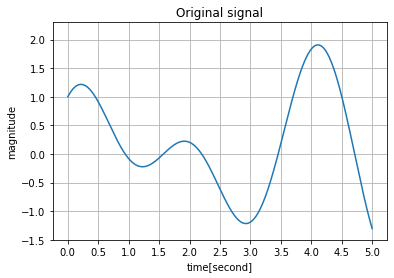

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Original signal
t = np.arange(0.0, 5.01, 0.01)
s = np.sin(2 * t) + np.cos(3 * t)


fig = plt.figure()
ax = fig.gca()

ax.set_xticks(np.arange(0, 5.1, 0.5))
ax.set_yticks(np.arange(-1.5, 2.1, 0.5))

plt.plot(t, s)
plt.xlabel('time[second]')
plt.ylabel('magnitude')
plt.title('Original signal')
plt.grid()
plt.ylim((-1.5,2.3))
plt.show()

#### (1) Apply sampling with 2 $Hz$ sampling frequency to input signal f(x) and draw the resulting stem plot.
- The 1st sample starts from t = 0.

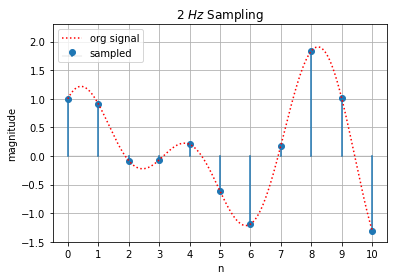

In [22]:
# your code here

#### (2) Apply 3-bit mid-tread quantizer to _2 Hz sampled input signal_ (i.e., output of problem (2)) and draw the resulting stem plot. 
- The dynamic range = [-1.5, 2.0]

Quantization step size = 0.4375


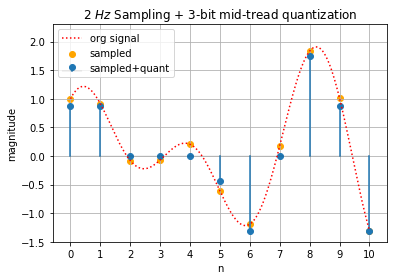

In [21]:
# your code here

However, it would be different if we applied <font color = blue>qStep = 0.5 </font> instead of qStep = $\frac{(Xmax - Xmin)}{\#levels} $ (This is not practical way). <br>
#### Try with qStep = 0.5.

Quantization step size = 0.5


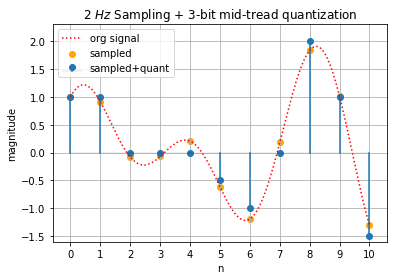

In [23]:
# your code here

#### (3) Apply 3-bit and 5-bit mid-tread quantizer and draw the resulting stem plot using subplot.
- The dynamic range = [-1.5, 2.0]

Quantization step size = 0.4375
Quantization step size = 0.109375


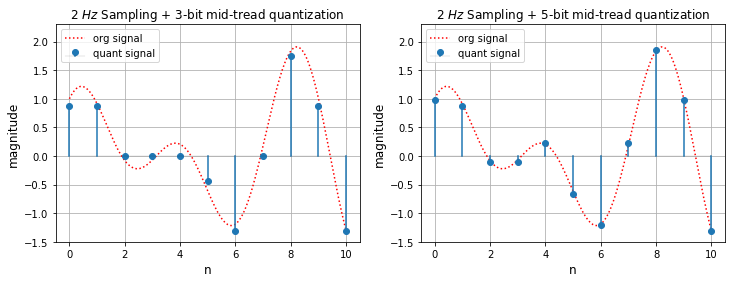

In [24]:
# your code here

#### (4) Apply sampling and 3-bit mid-tread quantizer to the sine wave (i.e., $sin(2*\pi*f*t),\ f = 1 $) in "04. Sampling and Quantization" and draw the resulting stem plot.
- Sampling frequency = 20 $Hz$ 
- t = [0, 1.0]


#### Since sine wave is symmetric, different approach can be applied.

##### Method 1 (<font color=blue>M1</font>): Mid-tread quantizer with odd levels (N - 1)
* Resulting the odd number of reconstruction levels because the sine wave is symmetric.

-1.0 1.0
Quantization step size = 0.2871428571428571


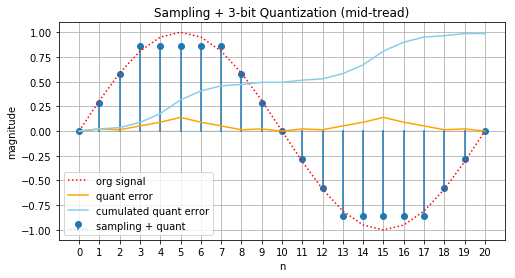

In [34]:
# This code uses qStep = (maxVal-minVal)/(nLevel-1)
# your code here

##### Method 2 (<font color=blue>M2</font>): Asymmetric mid-tread quantizer 
* This methods results in more errors on the signal around (+) 1.

-1.0 1.0
Quantization step size = 0.25125


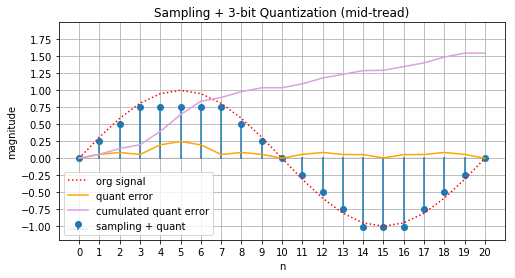

In [36]:
# This one uses qStep = (maxVal-minVal)/(nLevel)
# your code here

#### Let's compare the errors of both quantizers.

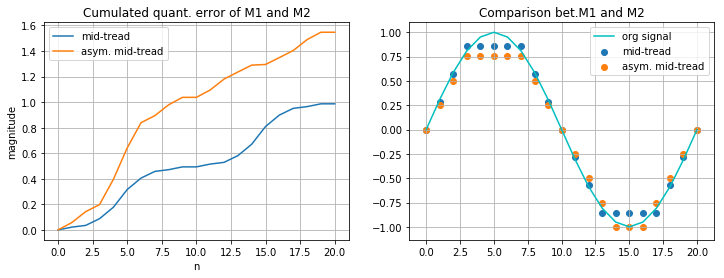

In [12]:
# your code here

<div class="alert alert-block alert-info">
Obviously, asymmetric mid-tread quantizer results in more error than mid-tread with odd levels (although it contains 8 reconstruction level).
</div>

#### (5) Apply sampling and 3-bit mid-riser quantizer for the sine wave (i.e., $sin(2*\pi*f*t),\ f = 1 $) in "03. Sampling and Quantization" and draw the resulting stem plot.
- Sampling frequency = 20 $Hz$ 
- t = [0, 1.0]


-1.0 1.0
Quantization step size = 0.25


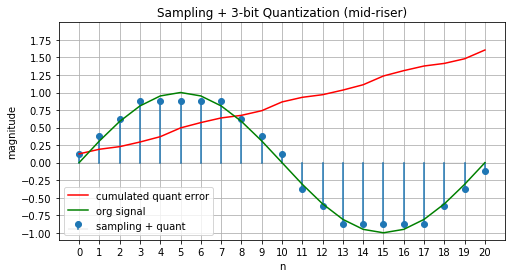

In [14]:
# your code here

#### (6) Draw the cumulated sum of quantization error of (5) and (6) together.
- Quantization error: abs(x - xq) (xq means quantized x)
- cumulated sum: np.cumsum(abs(x - xq))


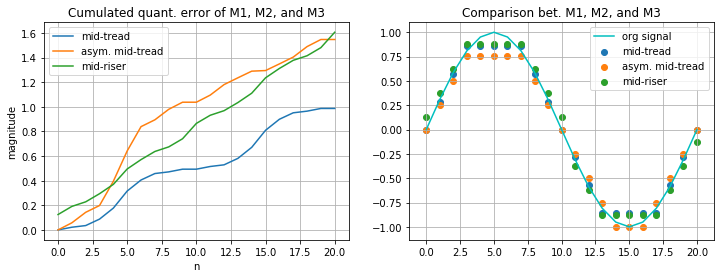

In [15]:
# your code here

<div class="alert alert-block alert-danger">
Can we conclude that the mid-tread quantizer is the best? <br>
<font color=red>Of course NOT! It depends on the sampling frequency and # of bits assigned, also the signal itself.
</font>
</div>

#### Check the results with __5 bits__ quantizer.


Quantization step size = 0.06483870967741935
Quantization step size = 0.0628125
Quantization step size = 0.0625


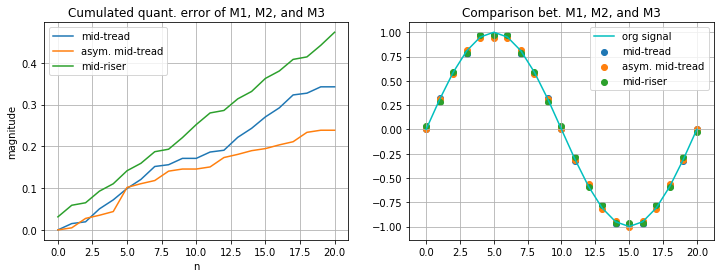

In [16]:
# your code here

<div class="alert alert-block alert-info">
However, the mid-tread uniform quantizer is the most commonly used quantizer in many applications (because many signals contains zero values).
</div>

This example shows how np.cumsum() works.<br>
cumsum: cumulated sum

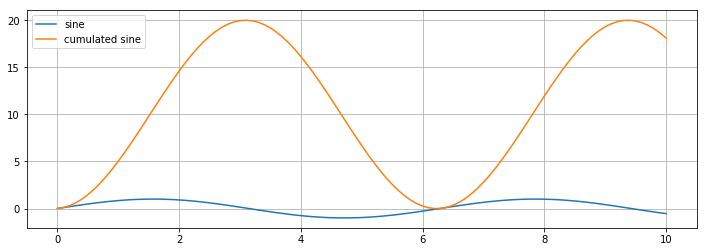

In [21]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 10.01, 0.1)
x = np.sin(t)
y = np.cumsum(x)

fig = plt.figure(figsize=(12,4))
plt.plot(t, x, label='sine')
plt.plot(t, y, label='cumulated sine')
plt.grid()
plt.legend(loc='upper left')
plt.show()
